# Regularized Regression Model

In [12]:
# import the necessary packages
import numpy as np
from matplotlib import pyplot as plt

Let's generate some data points first, by the equation $y = x - 3$. 

In [13]:
np.random.seed(100)
x = np.random.randint(100, size=100)/30 - 2
X = x.reshape(-1, 1)
print(X.shape)

y = x - 3 + 0.3*np.random.randn(100)
print(y.shape)

(100, 1)
(100,)


Let's then visualize the data points we just created. 

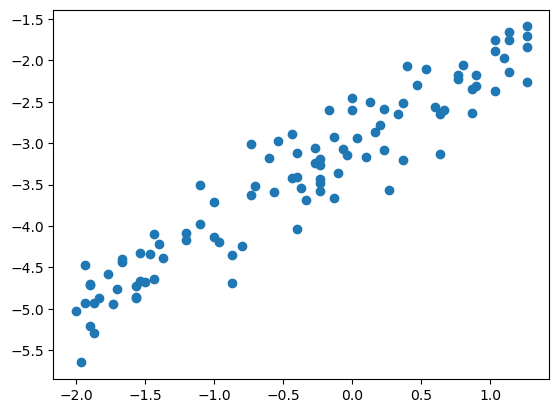

In [14]:
plt.scatter(X, y)

## Gradient of vanilla linear regression model

The cost function of a linear regression model can be expressed as **Equation 1**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$$ 

The gredient of it can be written as **Equation 2**:

$$\frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)\left(x^{(i)}\right)$$




## Gradient of vanilla regularized regression model

After adding the L2 regularization term, the linear regression model can be expressed as **Equation 3**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}+\frac{\lambda}{2 m} \sum_{j}^{n} (\theta_{j})^{2}$$

The gredient of it can be written as **Equation 4**:

$$\frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} \left(\sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)\left(x^{(i)}\right)+{\lambda}\sum_{j}^{n} (\theta_{j})\right)$$

## Implement a regularized regression model

Implement the cost function of a regularized regression model according to the above equations.

Implement the gradient of the cost function of a regularized regression model according to the above equations.


In [15]:
def regularized_linear_regression(X, y, alpha=0.01, lambda_value=1, epochs=30):
    """
    :param x: feature matrix
    :param y: target vector
    :param alpha: learning rate (default:0.01)
    :param lambda_value: lambda (default:1)
    :param epochs: maximum number of iterations of the
           linear regression algorithm for a single run (default=30)
    :return: weights, list of the cost function changing overtime
    """
 
    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features
 
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    # W is theta        
    W = np.random.randn(n + 1, )
 
    # stores the updates on the cost function (loss function)
    cost_history_list = []
 
    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process
 
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - y

        
############################################################################################################## 
################################## Begin of the cost function of a regularized regression model ##############
##############################################################################################################
      
        ##### Please write down your code here:####
        
        # calculate the cost (MSE) (Equation 1)
        cost_without_regularization = (1 / (2 * m)) * np.sum(error ** 2)
        
        ##### Please write down your code here:####
        
        # regularization term
        reg_term = (lambda_value / (2 * m)) * np.sum(np.square(W))
        
        
        # calculate the cost (MSE) + regularization term (Equation 3)
        cost_with_regularization = cost_without_regularization + reg_term
        
############################################################################################################## 
##################################################### End ####################################################
##############################################################################################################          
 
    
############################################################################################################## 
################## Begin of the gradient of the cost function of a regularized regression model ##############
############################################################################################################## 
        
        ##### Please write down your code here:####
        
        # calculate the gradient of the cost function with regularization term (Equation 4)
        gradient = (1 / m) * (X.T.dot(error) + (lambda_value * W))
 

        # Now we have to update our weights
        W = W - alpha * gradient
        
############################################################################################################## 
###################################################### End  ##################################################
##############################################################################################################          
 
 
        # keep track the cost as it changes in each iteration
        cost_history_list.append(cost_with_regularization)
        
    # Let's print out the cost
    print(f"Cost with regularization: {cost_with_regularization}")
    print(f"Mean square error: {cost_without_regularization}")
 
    return W, cost_history_list

Run the following code to train your model. 

Hint: If you have the correct code written above, the cost should be $0.5181222986588751$ when $\lambda = 10$.

Cost with regularization: 0.05165888565058275
Mean square error: 0.05165888565058275
y = 0.9754194588904372x + -3.0356624344673606


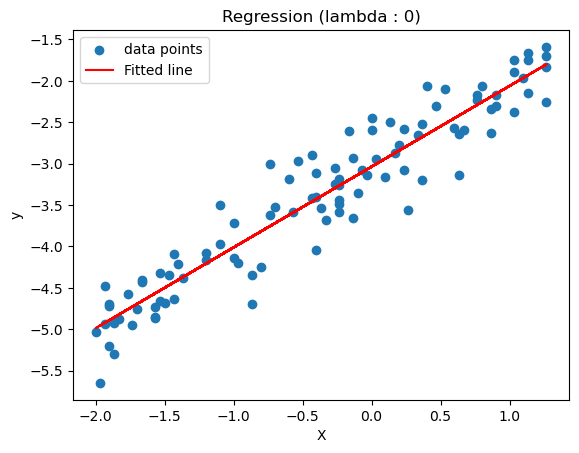

Cost with regularization: 0.5181225049184746
Mean square error: 0.08982014821513126
y = 0.9828973098088926x + -2.7568058539322893


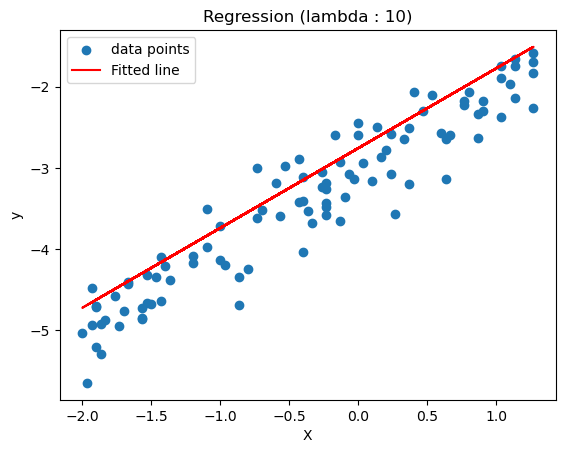

Cost with regularization: 2.793172488740026
Mean square error: 1.2785107029715974
y = 0.7823453448859966x + -1.5547537852616184


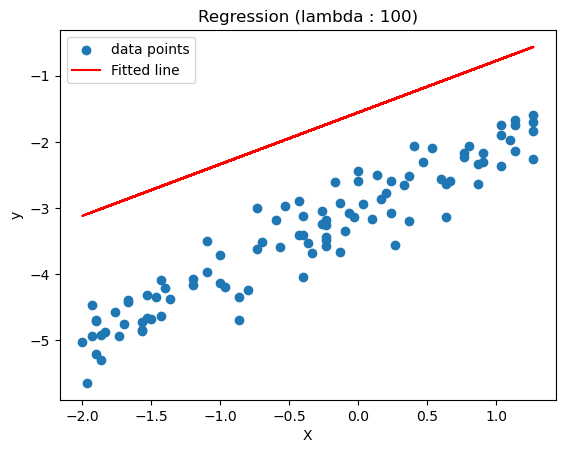

Cost with regularization: 5.591464362606628
Mean square error: 4.946888025066496
y = 0.192390324461395x + -0.30315215744187834


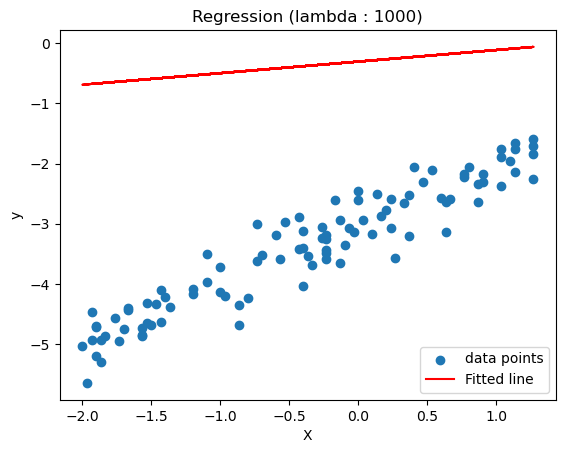

Cost with regularization: 6.2426956269339735
Mean square error: 6.1614425833558135
y = 0.0221829013865418x + -0.03365976466997586


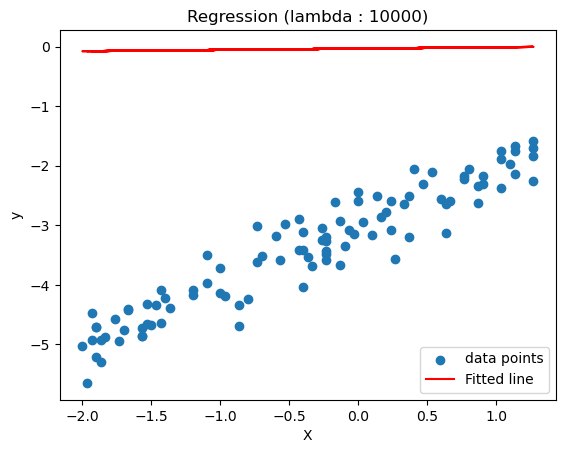

In [16]:
lambda_list = [0, 10, 100, 1000, 10000]
for lambda_ in lambda_list:
    # calls regression function with different values of lambda
    weight, _ = regularized_linear_regression(X, y, alpha=0.01,
                                 lambda_value=lambda_, epochs=1000)
    
    fitted_line = np.dot(X, weight[1]) + weight[0]
    print(f"y = {weight[1]}x + {weight[0]}")
    plt.scatter(X, y, label='data points')
    plt.plot(X, fitted_line, color='r', label='Fitted line')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Regression (lambda : {lambda_})")
    plt.legend()
    plt.show()

## Analyze your results


According to the above figures, what's the best choice of $\lambda$? 

Why the regressed line turns to be flat as we increase $\lambda$?


1. $\lambda = 0$

2. Because as the increasing of $\lambda$, in order to make sure the lower cost of $J(\theta)$, $\theta$ will be smaller. Thus the trend of value changes of $\theta_nx_n$ will be smaller and smaller. So regressed line will be flat and flat. 